In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from skimage import io
from PIL import Image, ImageOps, UnidentifiedImageError
import requests
from io import BytesIO

In [4]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pylab

We don't want to use scans that have no Majority Label nor Correct Label as these still need to be looked at by
neurosurgeons to verify if they have hemorrhaging or not

In [5]:
def read_csv(file_name):
    return pd.read_csv('data/' + file_name, error_bad_lines=False)

In [6]:
epi = read_csv("Results_Epidural Hemorrhage Detection_2020-11-16_21.31.26.148.csv")
clean_epi = epi[(epi['Majority Label'] != '[]') | (epi['Correct Label'].notna()) & (epi['Correct Label'] != '[[], []]') ]

In [7]:
clean_epi.head()

,Case ID,Origin,URL,Labeling State,All Labels,Total Reads,Total Qualified Reads,Majority Label,Number of ROIs,Correct Label,Difficulty,Agreement,Comments,Internal Notes
0,1196514,ID_004c4b319.jpg,https://go.centaurlabs.com/problem/1196514,Labeled,"['[{""x"": 0.40818718, ""y"": 0.8623607}, {""x"": 0....",19.0,5.0,"[{""x"": 0.537109375, ""y"": 0.89453125}, {""x"": 0....",1.0,"[[{'x': 0.537109375, 'y': 0.89453125}, {'x': 0...",0.00,0.968851,NaN,NaN
1,1196682,ID_0237b835f.jpg,https://go.centaurlabs.com/problem/1196682,Ready,"['[{""x"": 0.62959146, ""y"": 0.720186}, {""x"": 0.6...",51.0,28.0,"[{""x"": 0.654296875, ""y"": 0.724609375}, {""x"": 0...",1.0,NaN,NaN,0.063519,NaN,NaN
2,1196477,ID_02e2d273d.jpg,https://go.centaurlabs.com/problem/1196477,Labeled,"['[{""x"": 0.35205495, ""y"": 0.34680602}, {""x"": 0...",22.0,6.0,"[{""x"": 0.46484375, ""y"": 0.357421875}, {""x"": 0....",1.0,"[[{'x': 0.46484375, 'y': 0.357421875}, {'x': 0...",0.06,0.710300,NaN,NaN
3,1196612,ID_02f37ce84.jpg,https://go.centaurlabs.com/problem/1196612,Ready,"['[{""x"": 0.3680166, ""y"": 0.48387372}, {""x"": 0....",51.0,29.0,"[{""x"": 0.431640625, ""y"": 0.607421875}, {""x"": 0...",2.0,NaN,NaN,0.264134,NaN,NaN
4,1196612,ID_02f37ce84.jpg,https://go.centaurlabs.com/problem/1196612,Ready,"['[{""x"": 0.3680166, ""y"": 0.48387372}, {""x"": 0....",51.0,29.0,"[{""x"": 0.353515625, ""y"": 0.59765625}, {""x"": 0....",2.0,NaN,NaN,0.264134,NaN,NaN


In [8]:
intra = read_csv("Results_Intraparenchymal Hemorrhage Detection_2020-11-16_21.39.31.268.csv")
clean_intra = intra[(intra['Majority Label'] != '[]') | (intra['Correct Label'].notna()) & (intra['Correct Label'] != '[[]]') ]
intra.shape

(1289, 14)

In [9]:
clean_intra.head()

,Case ID,Origin,URL,Labeling State,All Labels,Total Reads,Total Qualified Reads,Majority Label,Number of ROIs,Correct Label,Difficulty,Agreement,Comments,Internal Notes
0,1675660,ID_0002081b6.jpg,https://go.centaurlabs.com/problem/1675660,In Progress,"['[{""x"": 0.31658885, ""y"": 0.48357323}, {""x"": 0...",22.0,9.0,"[{""x"": 0.3046875, ""y"": 0.484375}, {""x"": 0.3046...",1.0,NaN,NaN,0.224542,NaN,NaN
1,1675942,ID_0048e60a4.jpg,https://go.centaurlabs.com/problem/1675942,In Progress,"['[{""x"": 0.54811704, ""y"": 0.5961946}, {""x"": 0....",22.0,7.0,"[{""x"": 0.5859375, ""y"": 0.640625}, {""x"": 0.5859...",1.0,NaN,NaN,0.772365,NaN,NaN
2,1197689,ID_0057d2736.jpg,https://go.centaurlabs.com/problem/1197689,Labeled,"['[{""x"": 0.3040109, ""y"": 0.52168596}, {""x"": 0....",46.0,9.0,"[{""x"": 0.3046875, ""y"": 0.521484375}, {""x"": 0.3...",1.0,"[[{'x': 0.3046875, 'y': 0.521484375}, {'x': 0....",0.02,0.738368,NaN,NaN
3,1197754,ID_007cac3b7.jpg,https://go.centaurlabs.com/problem/1197754,Labeled,"['[{""x"": 0.41792268, ""y"": 0.56897116}, {""x"": 0...",51.0,10.0,"[{""x"": 0.41015625, ""y"": 0.615234375}, {""x"": 0....",1.0,"[[{'x': 0.4140625, 'y': 0.6171875}, {'x': 0.41...",0.03,0.618086,NaN,NaN
4,1675775,ID_00b46c6bc.jpg,https://go.centaurlabs.com/problem/1675775,In Progress,"['[{""x"": 0.82215744, ""y"": 0.20116618}, {""x"": 0...",22.0,6.0,"[{""x"": 0.365234375, ""y"": 0.693359375}, {""x"": 0...",1.0,NaN,NaN,0.006388,NaN,NaN


In [7]:
multiple = read_csv("Results_Multiple Hemorrhage Detection_2020-11-16_21.36.24.018.csv")
clean_multiple = multiple[(multiple['Majority Label'] != '[]') | (multiple['Correct Label'].notna()) & (multiple['Correct Label'] != '[[]]') ]
multiple.shape

(1054, 14)

In [8]:
clean_multiple.head()

,Case ID,Origin,URL,Labeling State,All Labels,Total Reads,Total Qualified Reads,Majority Label,Number of ROIs,Correct Label,Difficulty,Agreement,Comments,Internal Notes
0,1198534,ID_01af922c3.jpg,https://go.centaurlabs.com/problem/1198534,In Progress,"['[{""x"": 0.372072, ""y"": 0.6399058}, {""x"": 0.36...",23.0,6.0,"[{""x"": 0.396484375, ""y"": 0.73046875}, {""x"": 0....",3.0,NaN,NaN,0.790347,NaN,NaN
1,1198534,ID_01af922c3.jpg,https://go.centaurlabs.com/problem/1198534,In Progress,"['[{""x"": 0.372072, ""y"": 0.6399058}, {""x"": 0.36...",23.0,6.0,"[{""x"": 0.619140625, ""y"": 0.765625}, {""x"": 0.61...",3.0,NaN,NaN,0.790347,NaN,NaN
2,1198534,ID_01af922c3.jpg,https://go.centaurlabs.com/problem/1198534,In Progress,"['[{""x"": 0.372072, ""y"": 0.6399058}, {""x"": 0.36...",23.0,6.0,"[{""x"": 0.46875, ""y"": 0.607421875}, {""x"": 0.468...",3.0,NaN,NaN,0.790347,NaN,NaN
3,1198791,ID_01c457a64.jpg,https://go.centaurlabs.com/problem/1198791,Labeled,"['[{""x"": 0.40734115, ""y"": 0.5586468}, {""x"": 0....",34.0,6.0,"[{""x"": 0.4375, ""y"": 0.7109375}, {""x"": 0.4375, ...",3.0,"[[{'x': 0.548828125, 'y': 0.6796875}, {'x': 0....",0.48,0.124994,NaN,NaN
4,1198791,ID_01c457a64.jpg,https://go.centaurlabs.com/problem/1198791,Labeled,"['[{""x"": 0.40734115, ""y"": 0.5586468}, {""x"": 0....",34.0,6.0,"[{""x"": 0.546875, ""y"": 0.671875}, {""x"": 0.54687...",3.0,"[[{'x': 0.548828125, 'y': 0.6796875}, {'x': 0....",0.48,0.124994,NaN,NaN


In [9]:
subarachnoid = read_csv("Results_Subarachnoid Hemorrhage Detection_2020-11-16_21.36.18.668.csv")
clean_subarachnoid = subarachnoid[(subarachnoid['Majority Label'] != '[]') | (subarachnoid['Correct Label'].notna()) & (subarachnoid['Correct Label'] != '[[]]') ]
subarachnoid.shape

(1031, 14)

In [10]:
clean_subarachnoid.head()

,Case ID,Origin,URL,Labeling State,All Labels,Total Reads,Total Qualified Reads,Majority Label,Number of ROIs,Correct Label,Difficulty,Agreement,Comments,Internal Notes
0,1197112,ID_001b1b944.jpg,https://go.centaurlabs.com/problem/1197112,In Progress,"['[{""x"": 0.43056944, ""y"": 0.5936399}, {""x"": 0....",16.0,5.0,"[{""x"": 0.314453125, ""y"": 0.75}, {""x"": 0.314453...",3.0,NaN,NaN,0.252748,NaN,NaN
1,1197112,ID_001b1b944.jpg,https://go.centaurlabs.com/problem/1197112,In Progress,"['[{""x"": 0.43056944, ""y"": 0.5936399}, {""x"": 0....",16.0,5.0,"[{""x"": 0.400390625, ""y"": 0.796875}, {""x"": 0.40...",3.0,NaN,NaN,0.252748,NaN,NaN
2,1197112,ID_001b1b944.jpg,https://go.centaurlabs.com/problem/1197112,In Progress,"['[{""x"": 0.43056944, ""y"": 0.5936399}, {""x"": 0....",16.0,5.0,"[{""x"": 0.556640625, ""y"": 0.302734375}, {""x"": 0...",3.0,NaN,NaN,0.252748,NaN,NaN
3,1197367,ID_005f428d2.jpg,https://go.centaurlabs.com/problem/1197367,Labeled,"['[{""x"": 0.59604716, ""y"": 0.4975766}, {""x"": 0....",29.0,5.0,"[{""x"": 0.54296875, ""y"": 0.763671875}, {""x"": 0....",2.0,"[[{'x': 0.626953125, 'y': 0.30078125}, {'x': 0...",0.33,0.763632,NaN,NaN
4,1197367,ID_005f428d2.jpg,https://go.centaurlabs.com/problem/1197367,Labeled,"['[{""x"": 0.59604716, ""y"": 0.4975766}, {""x"": 0....",29.0,5.0,"[{""x"": 0.630859375, ""y"": 0.30078125}, {""x"": 0....",2.0,"[[{'x': 0.626953125, 'y': 0.30078125}, {'x': 0...",0.33,0.763632,NaN,NaN


In [11]:
subdural1 = read_csv("Results_Subdural Hemorrhage Detection_2020-11-16_21.35.48.040.csv")
clean_subdural1 = subdural1[(subdural1['Majority Label'] != '[]') | (subdural1['Correct Label'].notna()) & (subdural1['Correct Label'] != '[[]]')]

In [12]:
clean_subdural1.head()

,Case ID,Origin,URL,Labeling State,All Labels,Total Reads,Total Qualified Reads,Majority Label,Number of ROIs,Correct Label,Difficulty,Agreement,Comments,Internal Notes
0,1198320,ID_0061cb462.jpg,https://go.centaurlabs.com/problem/1198320,Labeled,"['[{""x"": 0.4823523, ""y"": 0.59177}, {""x"": 0.473...",16.0,5.0,"[{""x"": 0.45703125, ""y"": 0.78125}, {""x"": 0.4570...",2.0,"[[{'x': 0.40625, 'y': 0.330078125}, {'x': 0.40...",0.29,0.949092,NaN,NaN
1,1198320,ID_0061cb462.jpg,https://go.centaurlabs.com/problem/1198320,Labeled,"['[{""x"": 0.4823523, ""y"": 0.59177}, {""x"": 0.473...",16.0,5.0,"[{""x"": 0.404296875, ""y"": 0.333984375}, {""x"": 0...",2.0,"[[{'x': 0.40625, 'y': 0.330078125}, {'x': 0.40...",0.29,0.949092,NaN,NaN
2,1198004,ID_0086b5e67.jpg,https://go.centaurlabs.com/problem/1198004,In Progress,"['[{""x"": 0.5224404, ""y"": 0.8304443}, {""x"": 0.5...",15.0,6.0,"[{""x"": 0.521484375, ""y"": 0.83203125}, {""x"": 0....",2.0,NaN,NaN,0.157037,NaN,NaN
3,1198004,ID_0086b5e67.jpg,https://go.centaurlabs.com/problem/1198004,In Progress,"['[{""x"": 0.5224404, ""y"": 0.8304443}, {""x"": 0.5...",15.0,6.0,"[{""x"": 0.478515625, ""y"": 0.83984375}, {""x"": 0....",2.0,NaN,NaN,0.157037,NaN,NaN
4,1198353,ID_00eb6f7cc.jpg,https://go.centaurlabs.com/problem/1198353,Labeled,"['[{""x"": 0.48163298, ""y"": 0.71568763}, {""x"": 0...",15.0,5.0,"[{""x"": 0.447265625, ""y"": 0.73828125}, {""x"": 0....",1.0,"[[{'x': 0.447265625, 'y': 0.73828125}, {'x': 0...",0.00,0.306828,NaN,NaN


In [13]:
subdural2 = read_csv("Results_Subdural Hemorrhage Detection_2020-11-16_21.37.19.745.csv")
clean_subdural2 = subdural2[(subdural2['Majority Label'] != '[]') | (subdural2['Correct Label'].notna()) & (subdural2['Correct Label'] != '[[]]')]

In [14]:
clean_subdural2.head()

,Case ID,Origin,URL,Labeling State,All Labels,Total Reads,Total Qualified Reads,Majority Label,Number of ROIs,Correct Label,Difficulty,Agreement,Comments,Internal Notes
0,1198320,ID_0061cb462.jpg,https://go.centaurlabs.com/problem/1198320,Labeled,"['[{""x"": 0.4823523, ""y"": 0.59177}, {""x"": 0.473...",16.0,5.0,"[{""x"": 0.45703125, ""y"": 0.78125}, {""x"": 0.4570...",2.0,"[[{'x': 0.40625, 'y': 0.330078125}, {'x': 0.40...",0.29,0.949092,NaN,NaN
1,1198320,ID_0061cb462.jpg,https://go.centaurlabs.com/problem/1198320,Labeled,"['[{""x"": 0.4823523, ""y"": 0.59177}, {""x"": 0.473...",16.0,5.0,"[{""x"": 0.404296875, ""y"": 0.333984375}, {""x"": 0...",2.0,"[[{'x': 0.40625, 'y': 0.330078125}, {'x': 0.40...",0.29,0.949092,NaN,NaN
2,1198004,ID_0086b5e67.jpg,https://go.centaurlabs.com/problem/1198004,In Progress,"['[{""x"": 0.5224404, ""y"": 0.8304443}, {""x"": 0.5...",15.0,6.0,"[{""x"": 0.521484375, ""y"": 0.83203125}, {""x"": 0....",2.0,NaN,NaN,0.157037,NaN,NaN
3,1198004,ID_0086b5e67.jpg,https://go.centaurlabs.com/problem/1198004,In Progress,"['[{""x"": 0.5224404, ""y"": 0.8304443}, {""x"": 0.5...",15.0,6.0,"[{""x"": 0.478515625, ""y"": 0.83984375}, {""x"": 0....",2.0,NaN,NaN,0.157037,NaN,NaN
4,1198353,ID_00eb6f7cc.jpg,https://go.centaurlabs.com/problem/1198353,Labeled,"['[{""x"": 0.48163298, ""y"": 0.71568763}, {""x"": 0...",15.0,5.0,"[{""x"": 0.447265625, ""y"": 0.73828125}, {""x"": 0....",1.0,"[[{'x': 0.447265625, 'y': 0.73828125}, {'x': 0...",0.00,0.306828,NaN,NaN


In [15]:
# adding label column to all the dataframes
# ignore the warnings

# mapping of dummy label to class
label_key = {0: "epi", 1: "intra", 2: "multi", 3: "subarachnoid", 4: "subdural", 5: "intraventricular"}

clean_epi["label"] = 0
clean_intra["label"] = 1
clean_multiple["label"] = 2
clean_subarachnoid["label"] = 3
clean_subdural2["label"] = 4

<ipython-input-15-361e7f8991e3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_epi["label"] = 0
<ipython-input-15-361e7f8991e3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_intra["label"] = 1
<ipython-input-15-361e7f8991e3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

In [16]:
# removing flagged images
with open("flagged.txt", "r") as f:
    lines = f.readlines()
flagged = []
for l in lines:
    flagged.append(l.strip())
clean_epi = clean_epi.drop(clean_epi[clean_epi["Origin"].isin(flagged)].index)
clean_intra = clean_intra.drop(clean_intra[clean_intra["Origin"].isin(flagged)].index)
clean_multiple = clean_multiple.drop(clean_multiple[clean_multiple["Origin"].isin(flagged)].index)
clean_subarachnoid = clean_subarachnoid.drop(clean_subarachnoid[clean_subarachnoid["Origin"].isin(flagged)].index)
clean_subdural2 = clean_subdural2.drop(clean_subdural2[clean_subdural2["Origin"].isin(flagged)].index)

In [17]:
#adding images to the cleaned epidural dataframe
root_url = 'https://raw.githubusercontent.com/Red-Nova/MATH4570-Project-Data/main/BrainCT/'
class_to_df_dict = {'epidural':clean_epi,'intraparenchymal':clean_intra, 'multi': clean_multiple, 'subarachnoid':clean_subarachnoid,'subdural':clean_subdural2}

img_list = []
for class_name,df in ({'epidural':clean_epi}).items():

    for idx,fname in enumerate(df['Origin']):
        #for now, only process the brain window
        response = requests.get(url=f'{root_url}{class_name}/{class_name}/brain_window/{fname}')
        img = Image.open(BytesIO(response.content))
        img = ImageOps.grayscale(img)
        img = np.asarray(img)
        img = np.reshape(img, (512*512))
        img_list.append(img)

    img_df = pd.DataFrame({'image_matrix': img_list})
    clean_epi = pd.concat([df, img_df], axis=1)
    img_list = [] #reset the image list for the next dataframe

In [18]:
#adding images to the cleaned intraparenchymal dataframe
img_list = []
for class_name,df in ({'intraparenchymal':clean_intra}).items():

    for idx,fname in enumerate(df['Origin']):
        #for now, only process the brain window
        response = requests.get(url=f'{root_url}{class_name}/{class_name}/brain_window/{fname}')
        img = Image.open(BytesIO(response.content))
        img = ImageOps.grayscale(img)
        img = np.asarray(img)
        img = np.reshape(img, (512*512))
        img_list.append(img)

    img_df = pd.DataFrame({'image_matrix': img_list})
    clean_intra = pd.concat([df, img_df], axis=1)
    img_list = [] #reset the image list for the next dataframe

In [19]:
#adding images to the cleaned multiple dataframe
for class_name,df in ({'multi': clean_multiple}).items():

    for idx,fname in enumerate(df['Origin']):
        #for now, only process the brain window
        response = requests.get(url=f'{root_url}{class_name}/{class_name}/brain_window/{fname}')
        img = Image.open(BytesIO(response.content))
        img = ImageOps.grayscale(img)
        img = np.asarray(img)
        img = np.reshape(img, (512*512))
        img_list.append(img)

    img_df = pd.DataFrame({'image_matrix': img_list})
    clean_multiple = pd.concat([df, img_df], axis=1)
    img_list = [] #reset the image list for the next dataframe

In [20]:
#adding images to the cleaned subarachnoid dataframe
img_list = []
for class_name,df in ({'subarachnoid':clean_subarachnoid}).items():

    for idx,fname in enumerate(df['Origin']):
        #for now, only process the brain window
        response = requests.get(url=f'{root_url}{class_name}/{class_name}/brain_window/{fname}')
        try:
            img = Image.open(BytesIO(response.content))
            img = ImageOps.grayscale(img)
            img = np.asarray(img)
            img = np.reshape(img, (512*512))
            img_list.append(img)
        except (UnidentifiedImageError):
            continue

    img_df = pd.DataFrame({'image_matrix': img_list})
    clean_subarachnoid = pd.concat([df, img_df], axis=1)
    img_list = [] #reset the image list for the next dataframe

In [21]:
#adding images to the cleaned subdural dataframe
img_list = []
for class_name,df in ({'subdural':clean_subdural2}).items():

    for idx,fname in enumerate(df['Origin']):
        #for now, only process the brain window
        response = requests.get(url=f'{root_url}{class_name}/{class_name}/brain_window/{fname}')
        try:
            img = Image.open(BytesIO(response.content))
            img = ImageOps.grayscale(img)
            img = np.asarray(img)
            img = np.reshape(img, (512*512))
            img_list.append(img)
        except (UnidentifiedImageError, ValueError):
            continue

    img_df = pd.DataFrame({'image_matrix': img_list})
    clean_subdural2 = pd.concat([df, img_df], axis=1)
    img_list = [] #reset the image list for the next dataframe

In [22]:
clean_intraventricular = read_csv('intraventricular_names.csv')
clean_intraventricular["label"] = 5

In [23]:
clean_intraventricular = clean_intraventricular.sample(n=1000, random_state=1)
clean_intraventricular.reset_index(drop=True, inplace=True)
clean_intraventricular

,Origin,label
0,ID_bbeeebcb4.jpg,5
1,ID_45d22e0d2.jpg,5
2,ID_e06416baf.jpg,5
3,ID_d1e1cf46e.jpg,5
4,ID_e59b89254.jpg,5
...,...,...
995,ID_ce185e54c.jpg,5
996,ID_7611f6215.jpg,5
997,ID_f8b29717c.jpg,5
998,ID_43a5d226e.jpg,5


In [24]:
# loading in a sample of intraventricular images
img_list = []
for class_name,df in ({'intraventricular':clean_intraventricular}).items():
    
    for idx,fname in enumerate(df['Origin']):
        #for now, only process the brain window
        response = requests.get(url=f'{root_url}{class_name}/{class_name}/brain_window/{fname}')
        try:
            img = Image.open(BytesIO(response.content))
            img = ImageOps.grayscale(img)
            img = np.asarray(img)
            img = np.reshape(img, (512*512))
            img_list.append(img)
        except (UnidentifiedImageError, ValueError):
            continue

    img_df = pd.DataFrame({'image_matrix': img_list})
    clean_intraventricular = pd.concat([df, img_df], axis=1)
    img_list = [] #reset the image list for the next dataframe

In [25]:
# combining all the dataframes
combined = clean_epi.append(clean_intra)
combined = combined.append(clean_multiple)
combined = combined.append(clean_subarachnoid)
combined = combined.append(clean_subdural2)
combined

,Case ID,Origin,URL,Labeling State,All Labels,Total Reads,Total Qualified Reads,Majority Label,Number of ROIs,Correct Label,Difficulty,Agreement,Comments,Internal Notes,label,image_matrix
0,1196514.0,ID_004c4b319.jpg,https://go.centaurlabs.com/problem/1196514,Labeled,"['[{""x"": 0.40818718, ""y"": 0.8623607}, {""x"": 0....",19.0,5.0,"[{""x"": 0.537109375, ""y"": 0.89453125}, {""x"": 0....",1.0,"[[{'x': 0.537109375, 'y': 0.89453125}, {'x': 0...",0.00,0.968851,NaN,NaN,0.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1196682.0,ID_0237b835f.jpg,https://go.centaurlabs.com/problem/1196682,Ready,"['[{""x"": 0.62959146, ""y"": 0.720186}, {""x"": 0.6...",51.0,28.0,"[{""x"": 0.654296875, ""y"": 0.724609375}, {""x"": 0...",1.0,NaN,NaN,0.063519,NaN,NaN,0.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,1196477.0,ID_02e2d273d.jpg,https://go.centaurlabs.com/problem/1196477,Labeled,"['[{""x"": 0.35205495, ""y"": 0.34680602}, {""x"": 0...",22.0,6.0,"[{""x"": 0.46484375, ""y"": 0.357421875}, {""x"": 0....",1.0,"[[{'x': 0.46484375, 'y': 0.357421875}, {'x': 0...",0.06,0.710300,NaN,NaN,0.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,1196612.0,ID_02f37ce84.jpg,https://go.centaurlabs.com/problem/1196612,Ready,"['[{""x"": 0.3680166, ""y"": 0.48387372}, {""x"": 0....",51.0,29.0,"[{""x"": 0.431640625, ""y"": 0.607421875}, {""x"": 0...",2.0,NaN,NaN,0.264134,NaN,NaN,0.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,1196612.0,ID_02f37ce84.jpg,https://go.centaurlabs.com/problem/1196612,Ready,"['[{""x"": 0.3680166, ""y"": 0.48387372}, {""x"": 0....",51.0,29.0,"[{""x"": 0.353515625, ""y"": 0.59765625}, {""x"": 0....",2.0,NaN,NaN,0.264134,NaN,NaN,0.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
738,1198392.0,ID_ff1e93267.jpg,https://go.centaurlabs.com/problem/1198392,Labeled,"['[{""x"": 0.25159726, ""y"": 0.24648584}, {""x"": 0...",19.0,5.0,"[{""x"": 0.68359375, ""y"": 0.42578125}, {""x"": 0.6...",3.0,"[[{'x': 0.685546875, 'y': 0.43359375}, {'x': 0...",0.48,0.607623,NaN,NaN,4.0,NaN
739,1198392.0,ID_ff1e93267.jpg,https://go.centaurlabs.com/problem/1198392,Labeled,"['[{""x"": 0.25159726, ""y"": 0.24648584}, {""x"": 0...",19.0,5.0,"[{""x"": 0.630859375, ""y"": 0.24609375}, {""x"": 0....",3.0,"[[{'x': 0.685546875, 'y': 0.43359375}, {'x': 0...",0.48,0.607623,NaN,NaN,4.0,NaN
740,1198414.0,ID_ff2f3dbb7.jpg,https://go.centaurlabs.com/problem/1198414,Labeled,"['[{""x"": 0.70854944, ""y"": 0.6837957}, {""x"": 0....",14.0,6.0,"[{""x"": 0.70703125, ""y"": 0.67578125}, {""x"": 0.7...",1.0,"[[{'x': 0.70703125, 'y': 0.67578125}, {'x': 0....",0.15,0.153092,NaN,NaN,4.0,NaN
741,1198334.0,ID_04ab5246e.jpg,https://go.centaurlabs.com/problem/1198334,Labeled,"['[{""x"": 0.56073856, ""y"": 0.6705539}, {""x"": 0....",13.0,6.0,[],0.0,"[[{'x': 0.560546875, 'y': 0.669921875}, {'x': ...",0.33,0.833333,NaN,NaN,4.0,NaN


In [26]:
combined = combined[combined['label'].notna()]
combined = combined[combined['image_matrix'].notna()]

In [27]:
combined_final = combined[['image_matrix', 'label']]
clean_intraventricular = clean_intraventricular[['image_matrix', 'label']]
combined_final = combined_final.append(clean_intraventricular)
combined_final

,image_matrix,label
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0
...,...,...
995,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5.0
996,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5.0
997,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5.0
998,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5.0


In [28]:
# extracting X and y

X = np.array(combined_final['image_matrix'])
y = np.array(combined_final['label'])

data = np.zeros([5633, 262144])
for n, image in enumerate(X):
    data[n,:] = image

In [29]:
# splitting into training, testing, and validation sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=0)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=0.25, random_state=0)

print(y_train.shape, y_test.shape, y_valid.shape)

(4506,) (845,) (282,)


In [30]:
# downsampling each set with a factor of 16
DS = 16

if 262144/DS % 1 > 0:
    print("Downsample rate is not a multiple of 262144")
    DS = 1
    im_size = 262144
else:
    im_size = int(262144/DS)

N_train = y_train.shape[0]

Xds_train = np.zeros([N_train * DS, im_size])
yds_train = np.zeros([N_train * DS, 1])

for n in range(N_train):
    for i in range(DS):
        Xds_train[n+1,:] = X_train[n,i::DS]
        yds_train[n+1] = y[n]

N_test = y_test.shape[0]

Xds_test = np.zeros([N_test * DS, im_size])
yds_test = np.zeros([N_test * DS, 1])

for n in range(N_test):
    for i in range(DS):
        Xds_test[n+1,:] = X_test[n,i::DS]
        yds_test[n+1] = y[n]

N_valid = y_valid.shape[0]

Xds_valid = np.zeros([N_valid * DS, im_size])
yds_valid = np.zeros([N_valid * DS, 1])

for n in range(N_valid):
    for i in range(DS):
        Xds_valid[n+1,:] = X_valid[n,i::DS]
        yds_valid[n+1] = y[n]

print(Xds_train.shape, yds_train.shape)
print(Xds_test.shape, yds_test.shape)
print(Xds_valid.shape, yds_valid.shape)

(72096, 16384) (72096, 1)
(13520, 16384) (13520, 1)
(4512, 16384) (4512, 1)


In [31]:
X_train = Xds_train.reshape(-1, 128, 128, 1)
X_test = Xds_test.reshape(-1, 128, 128, 1)
X_valid = Xds_valid.reshape(-1, 128, 128, 1)

In [32]:
import tensorflow as tf
from tensorflow import keras
from numba import jit

In [34]:
# Adam
model_cnn_adam = keras.models.Sequential()
model_cnn_adam.add(keras.layers.Conv2D(32, (3,3), padding = 'valid', input_shape=(128,128,1), activation = 'relu'))
model_cnn_adam.add(keras.layers.MaxPooling2D((2,2)))
model_cnn_adam.add(keras.layers.Conv2D(64, (3,3), padding = 'valid', activation = 'relu'))
model_cnn_adam.add(keras.layers.MaxPooling2D((2,2)))
model_cnn_adam.add(keras.layers.Flatten())
model_cnn_adam.add(keras.layers.Dense(16))
model_cnn_adam.add(keras.layers.Dropout(0.5))
model_cnn_adam.add(keras.layers.Dense(6))

model_cnn_adam.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer="Adam")
model_cnn_adam.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 57600)             0         
_________________________________________________________________
dense (Dense)                (None, 16)                921616    
_________________________________________________________________
dropout (Dropout)            (None, 16)                0

In [35]:
print(X_train.shape)
print(yds_train.shape)

(72096, 128, 128, 1)
(72096, 1)


In [36]:
history_cnn_adam = model_cnn_adam.fit(X_train, yds_train, batch_size=512, epochs=3, verbose=1, validation_data=(X_valid, yds_valid)) 

Epoch 1/3
141/141 [==============================] - 558s 4s/step - loss: 0.8982 - accuracy: 0.9376 - val_loss: 5.9605e-07 - val_accuracy: 1.0000
Epoch 2/3
141/141 [==============================] - 542s 4s/step - loss: 0.8589 - accuracy: 0.9444 - val_loss: 5.9605e-07 - val_accuracy: 1.0000
Epoch 3/3
141/141 [==============================] - 536s 4s/step - loss: 0.8756 - accuracy: 0.9435 - val_loss: 5.9605e-07 - val_accuracy: 1.0000


In [37]:
pd.DataFrame.from_dict(history_cnn_adam.history).to_csv('history_cnn_adam.csv',index=False)

In [38]:
model_cnn_adam.evaluate(X_test, yds_test)

423/423 [==============================] - 28s 66ms/step - loss: 0.3243 - accuracy: 0.9799


[0.3242693841457367, 0.9798816442489624]

In [33]:
# SGD
np.random.seed(44)

K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

In [34]:
model_cnn_sgd = keras.models.Sequential()
model_cnn_sgd.add(keras.layers.Conv2D(32, (3,3), padding = 'valid', input_shape=(128,128,1), activation = 'relu'))
model_cnn_sgd.add(keras.layers.MaxPooling2D((2,2)))
model_cnn_sgd.add(keras.layers.Conv2D(64, (3,3), padding = 'valid', activation = 'relu'))
model_cnn_sgd.add(keras.layers.MaxPooling2D((2,2)))
model_cnn_sgd.add(keras.layers.Flatten())
model_cnn_sgd.add(keras.layers.Dense(16))
model_cnn_sgd.add(keras.layers.Dropout(0.5))
model_cnn_sgd.add(keras.layers.Dense(6))


model_cnn_sgd.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], 
                      optimizer=keras.optimizers.SGD(learning_rate=1e-3))
expon_lr_cnn_sgd = ExponentialLearningRate(factor = 1.001)
model_cnn_sgd.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 57600)             0         
_________________________________________________________________
dense (Dense)                (None, 16)                921616    
_________________________________________________________________
dropout (Dropout)            (None, 16)                0

In [36]:
history_cnn_sgd = model_cnn_sgd.fit(X_train, yds_train, batch_size=512, epochs=1, verbose=1, 
                                      validation_data=(X_valid, yds_valid), callbacks=[expon_lr_cnn_sgd])

141/141 [==============================] - 527s 4s/step - loss: 1.3951 - accuracy: 0.8530 - val_loss: 5.9605e-07 - val_accuracy: 1.0000


<function matplotlib.pyplot.show(close=None, block=None)>

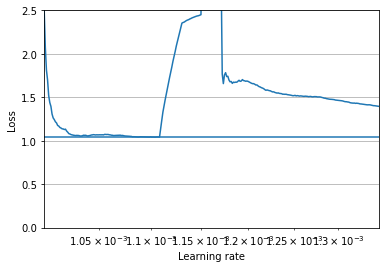

In [37]:
# finding best learning rate
plt.plot(expon_lr_cnn_sgd.rates, expon_lr_cnn_sgd.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr_cnn_sgd.losses), min(expon_lr_cnn_sgd.rates), max(expon_lr_cnn_sgd.rates))
plt.axis([min(expon_lr_cnn_sgd.rates), max(expon_lr_cnn_sgd.rates), 0, expon_lr_cnn_sgd.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.show

In [38]:
min(expon_lr_cnn_sgd.losses)

1.0409854650497437

In [39]:
expon_lr_cnn_sgd.rates[np.argmin(expon_lr_cnn_sgd.losses)]

0.0011040176

In [40]:
model_cnn_sgd = keras.models.Sequential()
model_cnn_sgd.add(keras.layers.Conv2D(32, (3,3), padding = 'valid', input_shape=(128,128,1), activation = 'relu'))
model_cnn_sgd.add(keras.layers.MaxPooling2D((2,2)))
model_cnn_sgd.add(keras.layers.Conv2D(64, (3,3), padding = 'valid', activation = 'relu'))
model_cnn_sgd.add(keras.layers.MaxPooling2D((2,2)))
model_cnn_sgd.add(keras.layers.Flatten())
model_cnn_sgd.add(keras.layers.Dense(16))
model_cnn_sgd.add(keras.layers.Dropout(0.5))
model_cnn_sgd.add(keras.layers.Dense(6))


model_cnn_sgd.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], 
                      optimizer=keras.optimizers.SGD(learning_rate=0.001))
model_cnn_sgd.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 126, 126, 32)      320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 57600)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                921616    
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)               

In [41]:
history_cnn_sgd = model_cnn_sgd.fit(X_train, yds_train, batch_size=512, epochs=3, verbose=1, 
                                      validation_data=(X_valid, yds_valid), callbacks=[expon_lr_cnn_sgd])

Epoch 1/3
141/141 [==============================] - 518s 4s/step - loss: 1.9078 - accuracy: 0.7516 - val_loss: 0.6931 - val_accuracy: 1.0000
Epoch 2/3
141/141 [==============================] - 512s 4s/step - loss: 1.4481 - accuracy: 0.9096 - val_loss: 0.6931 - val_accuracy: 1.0000
Epoch 3/3
141/141 [==============================] - 457s 3s/step - loss: 1.3287 - accuracy: 0.9256 - val_loss: 5.9605e-07 - val_accuracy: 1.0000


In [89]:
pd.DataFrame.from_dict(history_cnn_sgd.history).to_csv('history_cnn_sgd.csv',index=False)

In [90]:
model_cnn_sgd.evaluate(X_test, yds_test)

423/423 [==============================] - 18s 43ms/step - loss: 0.3243 - accuracy: 0.9799


[0.3242693841457367, 0.9798816442489624]

In [36]:
# adamax
model_cnn_adamax = keras.models.Sequential()
model_cnn_adamax.add(keras.layers.Conv2D(32, (3,3), padding = 'valid', input_shape=(128,128,1), activation = 'relu'))
model_cnn_adamax.add(keras.layers.MaxPooling2D((2,2)))
model_cnn_adamax.add(keras.layers.Conv2D(64, (3,3), padding = 'valid', activation = 'relu'))
model_cnn_adamax.add(keras.layers.MaxPooling2D((2,2)))
model_cnn_adamax.add(keras.layers.Flatten())
model_cnn_adamax.add(keras.layers.Dense(16))
model_cnn_adamax.add(keras.layers.Dropout(0.5))
model_cnn_adamax.add(keras.layers.Dense(6))

model_cnn_adamax.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer="Adamax")
model_cnn_adamax.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 16)                9

In [37]:
print(X_train.shape)
print(yds_train.shape)

(72096, 128, 128, 1)
(72096, 1)


In [38]:
history_cnn_adamax = model_cnn_adamax.fit(X_train, yds_train, batch_size=512, epochs=3, verbose=1, validation_data=(X_valid, yds_valid)) 

Epoch 1/3
141/141 [==============================] - 341s 2s/step - loss: 0.8782 - accuracy: 0.9191 - val_loss: 0.1120 - val_accuracy: 0.9375
Epoch 2/3
141/141 [==============================] - 349s 2s/step - loss: 0.5077 - accuracy: 0.9522 - val_loss: 0.1120 - val_accuracy: 0.9375
Epoch 3/3
141/141 [==============================] - 347s 2s/step - loss: 0.4909 - accuracy: 0.9522 - val_loss: 0.1120 - val_accuracy: 0.9375


In [39]:
pd.DataFrame.from_dict(history_cnn_adamax.history).to_csv('history_cnn_adamax.csv',index=False)

In [40]:
model_cnn_adamax.evaluate(X_test, yds_test)

423/423 [==============================] - 19s 44ms/step - loss: 0.1120 - accuracy: 0.9393


[0.11202788352966309, 0.9393491148948669]

In [41]:
# Adadelta
model_cnn_adadelta = keras.models.Sequential()
model_cnn_adadelta.add(keras.layers.Conv2D(32, (3,3), padding = 'valid', input_shape=(128,128,1), activation = 'relu'))
model_cnn_adadelta.add(keras.layers.MaxPooling2D((2,2)))
model_cnn_adadelta.add(keras.layers.Conv2D(64, (3,3), padding = 'valid', activation = 'relu'))
model_cnn_adadelta.add(keras.layers.MaxPooling2D((2,2)))
model_cnn_adadelta.add(keras.layers.Flatten())
model_cnn_adadelta.add(keras.layers.Dense(16))
model_cnn_adadelta.add(keras.layers.Dropout(0.5))
model_cnn_adadelta.add(keras.layers.Dense(6))

model_cnn_adadelta.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer="Adadelta")
model_cnn_adadelta.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 57600)             0         
                                                                 
 dense_2 (Dense)             (None, 16)               

In [42]:
print(X_train.shape)
print(yds_train.shape)

(72096, 128, 128, 1)
(72096, 1)


In [43]:
history_cnn_adadelta = model_cnn_adadelta.fit(X_train, yds_train, batch_size=512, epochs=3, verbose=1, validation_data=(X_valid, yds_valid)) 

Epoch 1/3
141/141 [==============================] - 346s 2s/step - loss: 0.6215 - accuracy: 0.9404 - val_loss: 1.0801 - val_accuracy: 0.9375
Epoch 2/3
141/141 [==============================] - 357s 3s/step - loss: 0.5541 - accuracy: 0.9489 - val_loss: 1.0712 - val_accuracy: 0.9375
Epoch 3/3
141/141 [==============================] - 344s 2s/step - loss: 0.5554 - accuracy: 0.9483 - val_loss: 1.0668 - val_accuracy: 0.9375


In [44]:
pd.DataFrame.from_dict(history_cnn_adadelta.history).to_csv('history_cnn_adadelta.csv',index=False)

In [46]:
model_cnn_adadelta.evaluate(X_test, yds_test)

423/423 [==============================] - 18s 43ms/step - loss: 0.7936 - accuracy: 0.9385


[0.7935603260993958, 0.9385355114936829]

In [47]:
# Adagrad
model_cnn_adagrad = keras.models.Sequential()
model_cnn_adagrad.add(keras.layers.Conv2D(32, (3,3), padding = 'valid', input_shape=(128,128,1), activation = 'relu'))
model_cnn_adagrad.add(keras.layers.MaxPooling2D((2,2)))
model_cnn_adagrad.add(keras.layers.Conv2D(64, (3,3), padding = 'valid', activation = 'relu'))
model_cnn_adagrad.add(keras.layers.MaxPooling2D((2,2)))
model_cnn_adagrad.add(keras.layers.Flatten())
model_cnn_adagrad.add(keras.layers.Dense(16))
model_cnn_adagrad.add(keras.layers.Dropout(0.5))
model_cnn_adagrad.add(keras.layers.Dense(6))

model_cnn_adagrad.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer="Adagrad")
model_cnn_adagrad.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 57600)             0         
                                                                 
 dense_4 (Dense)             (None, 16)               

In [49]:
history_cnn_adagrad = model_cnn_adagrad.fit(X_train, yds_train, batch_size=512, epochs=3, verbose=1, validation_data=(X_valid, yds_valid)) 

Epoch 1/3
141/141 [==============================] - 343s 2s/step - loss: 0.5688 - accuracy: 0.9394 - val_loss: 0.3019 - val_accuracy: 0.9375
Epoch 2/3
141/141 [==============================] - 355s 3s/step - loss: 0.5379 - accuracy: 0.9481 - val_loss: 0.1184 - val_accuracy: 0.9375
Epoch 3/3
141/141 [==============================] - 345s 2s/step - loss: 0.4436 - accuracy: 0.9469 - val_loss: 0.1121 - val_accuracy: 0.9375


In [50]:
pd.DataFrame.from_dict(history_cnn_adagrad.history).to_csv('history_cnn_adagrad.csv',index=False)

In [51]:
model_cnn_adagrad.evaluate(X_test, yds_test)

423/423 [==============================] - 18s 43ms/step - loss: 0.1121 - accuracy: 0.9375


[0.1120600700378418, 0.9375]

In [35]:
# Nadam
model_cnn_nadam = keras.models.Sequential()
model_cnn_nadam.add(keras.layers.Conv2D(32, (3,3), padding = 'valid', input_shape=(128,128,1), activation = 'relu'))
model_cnn_nadam.add(keras.layers.MaxPooling2D((2,2)))
model_cnn_nadam.add(keras.layers.Conv2D(64, (3,3), padding = 'valid', activation = 'relu'))
model_cnn_nadam.add(keras.layers.MaxPooling2D((2,2)))
model_cnn_nadam.add(keras.layers.Flatten())
model_cnn_nadam.add(keras.layers.Dense(16))
model_cnn_nadam.add(keras.layers.Dropout(0.5))
model_cnn_nadam.add(keras.layers.Dense(6))

model_cnn_nadam.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer="Nadam")
model_cnn_nadam.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 16)                9

In [36]:
history_cnn_nadam = model_cnn_nadam.fit(X_train, yds_train, batch_size=512, epochs=3, verbose=1, validation_data=(X_valid, yds_valid)) 

Epoch 1/3
141/141 [==============================] - 347s 2s/step - loss: 0.9471 - accuracy: 0.9066 - val_loss: 1.0074 - val_accuracy: 0.9375
Epoch 2/3
141/141 [==============================] - 354s 3s/step - loss: 0.6541 - accuracy: 0.9416 - val_loss: 8.1956e-07 - val_accuracy: 1.0000
Epoch 3/3
141/141 [==============================] - 349s 2s/step - loss: 0.5913 - accuracy: 0.9432 - val_loss: 0.1247 - val_accuracy: 0.9375


In [39]:
pd.DataFrame.from_dict(history_cnn_nadam.history).to_csv('history_cnn_nadam.csv',index=False)

In [38]:
model_cnn_nadam.evaluate(X_test, yds_test)

423/423 [==============================] - 18s 42ms/step - loss: 0.1236 - accuracy: 0.9375


[0.1236410140991211, 0.9375]

In [42]:
# RMSprop
model_cnn_rmsprop = keras.models.Sequential()
model_cnn_rmsprop.add(keras.layers.Conv2D(32, (3,3), padding = 'valid', input_shape=(128,128,1), activation = 'relu'))
model_cnn_rmsprop.add(keras.layers.MaxPooling2D((2,2)))
model_cnn_rmsprop.add(keras.layers.Conv2D(64, (3,3), padding = 'valid', activation = 'relu'))
model_cnn_rmsprop.add(keras.layers.MaxPooling2D((2,2)))
model_cnn_rmsprop.add(keras.layers.Flatten())
model_cnn_rmsprop.add(keras.layers.Dense(16))
model_cnn_rmsprop.add(keras.layers.Dropout(0.5))
model_cnn_rmsprop.add(keras.layers.Dense(6))

model_cnn_rmsprop.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer="RMSprop")
model_cnn_rmsprop.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 126, 126, 32)      320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 57600)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                921616    
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)               

In [ ]:
history_cnn_rmsprop = model_cnn_rmsprop.fit(X_train, yds_train, batch_size=512, epochs=3, verbose=1, validation_data=(X_valid, yds_valid)) 

Epoch 1/3
 83/141 [================>.............] - ETA: 3:36 - loss: 0.8713 - accuracy: 0.9293

In [ ]:
pd.DataFrame.from_dict(history_cnn_rmsprop.history).to_csv('history_cnn_rmsprop.csv',index=False)

In [ ]:
model_cnn_rmsprop.evaluate(X_test, yds_test)